### Chapter 06 비지도 학습 ▶️비슷한 과일끼리 모으자!
#### 06-3 주성분 분석 ▶️차원을 알고 차원 축소 알고리즘 PC 모델 만들기 
----

- 차원축소 : 데이터를 가장 잘 나타내는 일부 특성을 선택하여, 데이터 크기를 줄이고 학습모델의 성능을 향상시키는 방법
- PCA(Principle Component Analysis) : 데이터의 분산이 가장 큰 방향을 찾는 방법, 원본 데이터를 주성분에 투영하여 갯수를 줄인다. 
- 차원을 줄이는 것의 장점 : (1) 시각화 하기 쉽다. (2) 다른 알고리즘에 재사용 -> 성능과 속도를 향상 

In [42]:
## 이미지 데이터를 불러와 넘파이 행렬로 변환 (300x100x100 --> 300x1000)
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

#!pip install wget 
#import wget 
#wget.download('https://bit.ly/fruits_300_data')
fruits = np.load('fruits_300_data')
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

In [7]:
## 이미지 출력을 위한 함수 제작 
## 3차원 배열을 입력받아, 가로 10개의 이미지 출력. 샘플 갯수에 따라 rows/cols 갯수를 계산하여 figsize 지정 

def draw_fruits(arr, ratio = 0.5): # ratio로 figsize 조정 
    n = len(arr)    # n은 샘플 개수입니다
    
    rows = int(np.ceil(n/10)) # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    cols = n if rows < 2 else 10 # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    # squeeze 매개변수 기본값은 True. 만약 subplots(1, 1)로 호출하면 이 함수가 반환되는 axs 배열은 (10, 1)이 아니라 (10,)이 됩니다.
    # 즉 원소 개수가 1인 차원을 자동으로 압축하여 차원을 축소시킵니다.
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    
    plt.show()    

----
#### 1. PCA를 사용한 차원 축소 

In [5]:
## 몇개의 차원으로 축소시킬지, n_components 갯수를 지정해야 함 (갯수대신 설명하고자 하는 분산 비율을 입력할 수도 있음)
## 축소된 주성분들은 components_에 저장됨 
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

print( pca.components_.shape )
pca.components_[:1]

(50, 10000)


array([[ 9.24490195e-06,  5.10601298e-06,  8.91640398e-06, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

- n_components = 50으로 지정했으므로, 300 x 1000의 첫번째 차원 300이 50개의 주성분으로 축약됨 -> 데이터 특징 요약
- 두번째 차원은 원본데이터의 features 갯수가 10000이므로, 동일하게 10000임 
- 즉, 다음 단계에서 pca가 찾은 50개의 특징을 사용하여, 10000개의 features를 50개로 요약하게 됨 

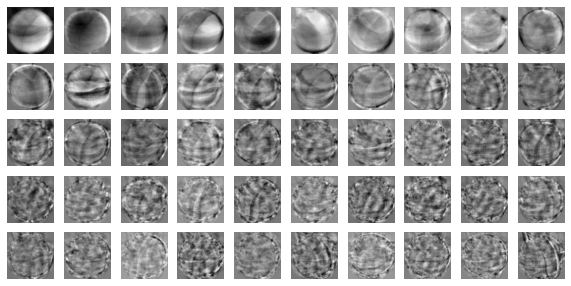

In [9]:
draw_fruits(pca.components_.reshape(-1, 100, 100), ratio = 1)

In [16]:
## transform()으로 차원 요약하기 (1만개의 features를 50개의 주성분으로 요약)
print('- 원본 데이터 크기 :', fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)
print('- 축소된 데이터 크기' , fruits_pca.shape)

- 원본 데이터 크기 : (300, 10000)
- 축소된 데이터 크기 (300, 50)


In [17]:
## inverse_transform()으르 사용하면 축소된 데이터를 원복시킬수도 있다. 
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

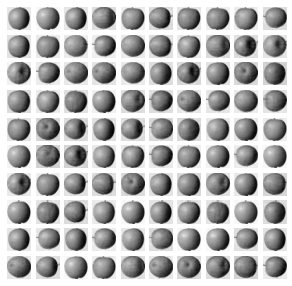

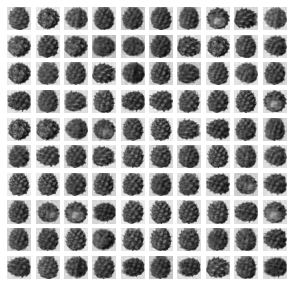

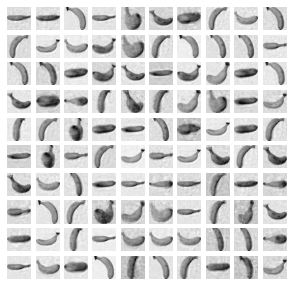

In [21]:
## 원복된 데이터를 100x100 행렬로 변환하여, 이미지 출력하기 
fruits_re_draw = fruits_inverse.reshape(-1, 100, 100)

for i in [0, 100, 200]: 
    draw_fruits(fruits_re_draw[i : i+100])    

- 50개의 요약 데이터를 기반으로 10000개의 이미지를 만들었음에도 불구, 원본가 거의 유사한 결과를 나타내었다. 
----

#### 2. Explained Variance : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내고 있는가
- explained_variance_ratio_에 각 주성분의 설명된 분산 비율 저장됨 
- 모두 더하면 지정했던 주성분(50개)들이 총 얼마나 많은 분산을 포함하는지 알 수 있다. 
- 주성분의 갯수 변화에 따라 explained variance의 총량 변화를 관찰하면, 몇개의 주성분이 분석에 적합한지 판단할 수 있다.

In [23]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511202, 0.00486383, 0.00480344,
       0.00447829, 0.00437318, 0.00408038, 0.00389473, 0.00372446,
       0.0035928 , 0.00331458, 0.0031782 , 0.00304308, 0.0030362 ,
       0.00288678, 0.00275774, 0.00264806, 0.00255544, 0.00252164,
       0.00247305, 0.00239563, 0.00230989, 0.00221768, 0.00216942,
       0.00213819, 0.00196142, 0.00192771, 0.00189746, 0.00184111,
       0.00178585, 0.00173564, 0.00169211, 0.00163519, 0.00160366])

In [24]:
sum(pca.explained_variance_ratio_)

0.9215297832733217

- 50개의 주성분으로, 10000개 데이터의 약 92% 분산을 설명하고 있다. 

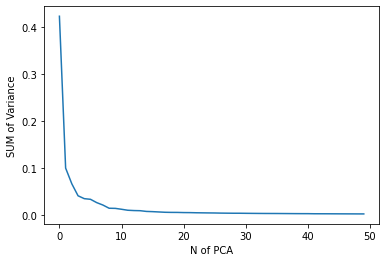

In [26]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('N of PCA')
plt.ylabel('SUM of Variance')
plt.show()

- 10000개의 데이터를 설명하는데, 10개 이하의 주성분으로도 충분한 것으로 보인다. 

----
#### 3. PCA로 축소된 데이터를 활용한 분석 - 1) Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

## 로지스틱 회귀분석을 위해 타겟값 - 0, 1, 2 생성 
target = np.array([0]*100 + [1]*100 + [2]*100)

In [32]:
## 원본 데이터와 축소된 데이터에 대한 LogisticRegression 분석결과 비교 

from sklearn.model_selection import cross_validate

score_1 = cross_validate(lr, fruits_2d, target)
print('-원본데이터의 모형정확도 =', np.mean(score_1['test_score']))
print('-원본데이터의 훈련시간 =', np.mean(score_1['fit_time']))

score_2 = cross_validate(lr, fruits_pca, target)
print('-축소된 데이터의 모형정확도 =', np.mean(score_2['test_score']))
print('-축소된 데이터의 훈련시간 =', np.mean(score_2['fit_time']))

-원본데이터의 모형정확도 = 0.9966666666666667
-원본데이터의 훈련시간 = 0.3220719814300537
-축소된 데이터의 모형정확도 = 1.0
-축소된 데이터의 훈련시간 = 0.018604135513305663


In [35]:
## n_components 옵션에서 주성분의 갯수 대신 원하는 explained variance 비율을 지정할 수도 있음 
pca_2 = PCA(n_components = 0.5)
pca_2.fit(fruits_2d)

pca_2.n_components_

2

- 전체 10000개 데이터의 50%를 설명하는데, 단 2개의 주성분이면 충분함 

In [41]:
## 2개의 주성분으로 원본 데이터를 축소하고, 로지스틱 회귀분석에 적용해보기 
fruits_pca_2 = pca_2.transform(fruits_2d)
print('-2개의 주성분으로 축소된 데이터 형태' , fruits_pca_2.shape)

score_3 = cross_validate(lr, fruits_pca_2, target)
print('-2개의 주성분으로 축소된 데이터의 모형정확도 =', np.mean(score_3['test_score']))
print('-2개의 주성분으로 축소된 데이터의 훈련시간 =', np.mean(score_3['fit_time']))

-2개의 주성분으로 축소된 데이터 형태 (300, 2)
-2개의 주성분으로 축소된 데이터의 모형정확도 = 0.9933333333333334
-2개의 주성분으로 축소된 데이터의 훈련시간 = 0.027005863189697266


- 단 2개의 주성분으로 축소되었음에도, 99%의 정확도를 나타냄 
----
#### 3. PCA로 축소된 데이터를 활용한 분석 - 2) KMeans clustering

In [44]:
from sklearn.cluster import KMeans 
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca_2)

np.unique(km.labels_, return_counts = True)

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))

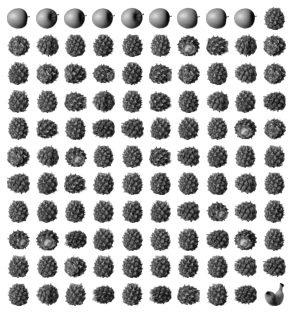

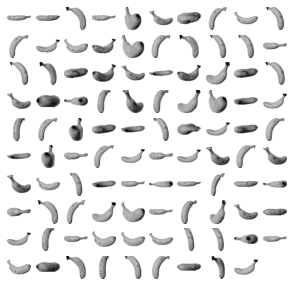

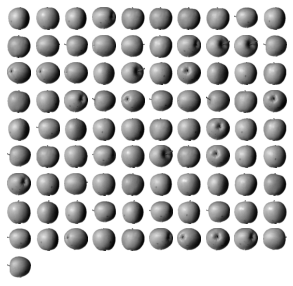

In [57]:
## 2개의 주성분을 가진 데이터에 대해 KMeans가 그룹핑한 3개 군집(labels)을 바탕으로, 원본 데이터 이미지 출력해보기 
for j in range(0,3): 
    draw_fruits(fruits[km.labels_ == j])

- 10000개의 특성을 사용한 원본 데이터에 대한 클러스터링 결과와, 단 2개 주성분을 사용해 분석한 결과가 거의 비슷하다. 

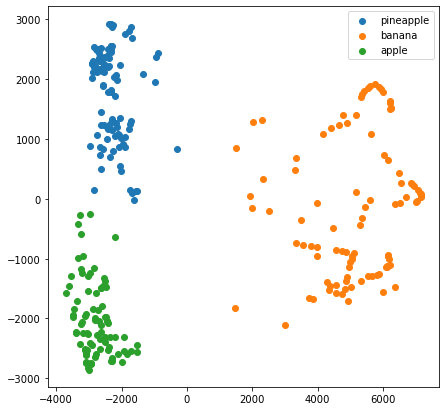

In [77]:
## 주성분으로 요약되었기 때문에, 시각화 하기 좋다. 
## fruits_pca_2는 2개의 특성을 가졌으므로, 2차원 평면으로 산점도를 그릴 수 있다. 

plt.figure(figsize=(7,7))

for k in range(0,3): 
    data = fruits_pca_2[km.labels_ == k]
    plt.scatter(data[:, 0], data[:, 1])
    
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()